# Feature Engineering_2

## 2. Bining and Linear, Tree Model

How to express data is important part of machine learning and affect differently on each model.

Basically, there are linear model and tree model. 

Especially, tree model is more sensitive with expression method.

Compare between linear regression model and decision tree model to see difference.

#### Compare

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line, reg.predict(line), label="Decision Tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="Linear Regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Feature input")
plt.legend(loc="best")

There is only one feature as input, so **Linear model** is expressed as a line.

However, **Decision Tree** makes more complicated model.


### At this, One method to make very powerful linear model for continuous model is Binning.

I am going to make 10 section from -3 to 3.

##### Make Section

In [2]:
bins = np.linspace(-3, 3, 11)
print("Section: {}".format(bins))


Section: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


##### Record which section  a data point belong to

In [3]:
which_bin = np.digitize(X, bins=bins)
print("\nData point:\n", X[:5])
print("\nIn which section:\n", which_bin[:5])


Data point:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

In which section:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


##### Apply OneHotEncoder to which_bin to use in scikit-learn

In [4]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)

X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Let's see changed Linear Regression

Text(0.5,0,'Feature input')

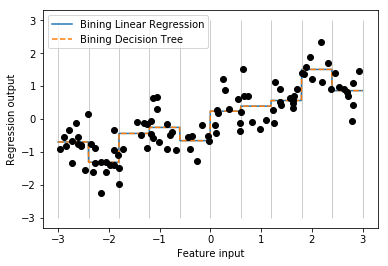

In [5]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='Bining Linear Regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line, reg.predict(line_binned), '--', label='Bining Decision Tree')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Feature input")

####  Conclusion

When it comes to **Linear Regression**, we can see Linear model become more flexible predicting same value in section.

But in **Decision Tree**, it become less flexible. Actually, there is any meaningful benefit at all for decision tree since 

it can automatically split section to get better model.

To warp up, some feature and output is non-linear, but you have to use linear model because memory is too large and has high dimension,

Then, Using Bining could highly improve your model.